Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [ ]:
# Your code here


Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv('concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [17]:
blast_furnace=df['Blast Furnace Slag'].corr(df['Strength'])
print(blast_furnace)

0.1348292614974049


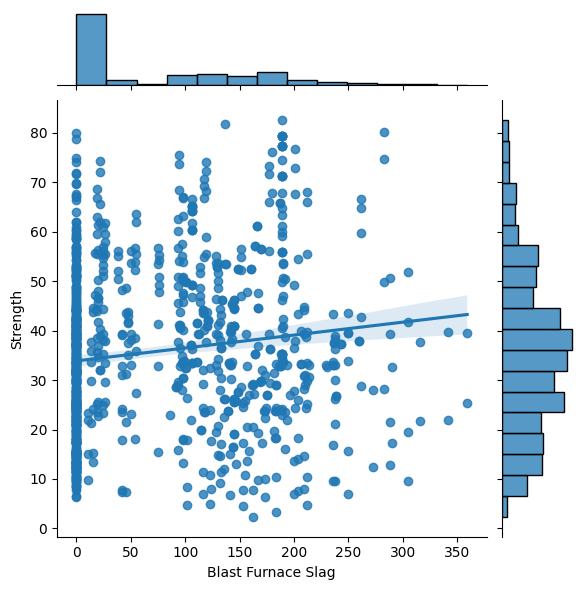

In [12]:
g=sns.JointGrid(data=df,y='Strength',x='Blast Furnace Slag')
g.plot(sns.regplot,sns.histplot)

In [19]:
Fly_ash=df['Fly Ash'].corr(df['Strength'])
print(Fly_ash)

-0.10575491629731368


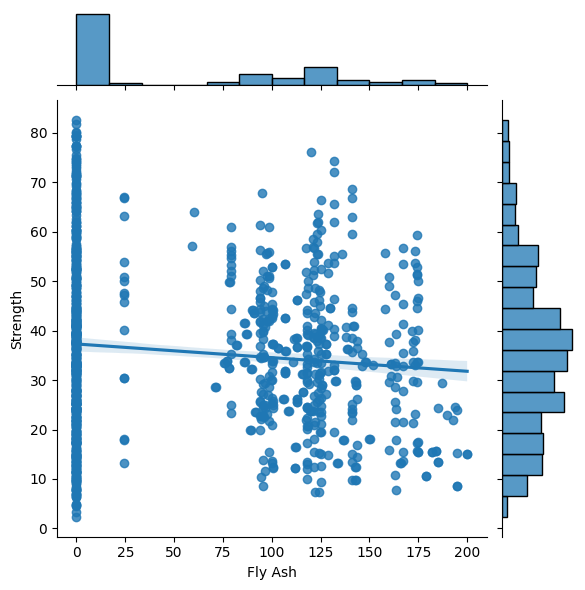

In [13]:
g=sns.JointGrid(data=df,y='Strength',x='Fly Ash')
g.plot(sns.regplot,sns.histplot)

In [23]:
water=df['Strength'].corr(df['Water'])
print(water)

-0.2896333849853048


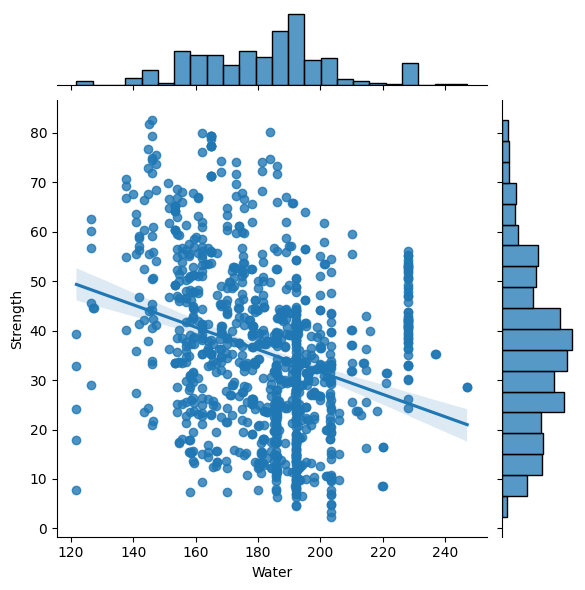

In [14]:
g=sns.JointGrid(data=df,y='Strength',x='Water')
g.plot(sns.regplot,sns.histplot)

In [22]:
plastic=df['Superplasticizer'].corr(df['Strength'])
print(plastic)

0.3660788271885196


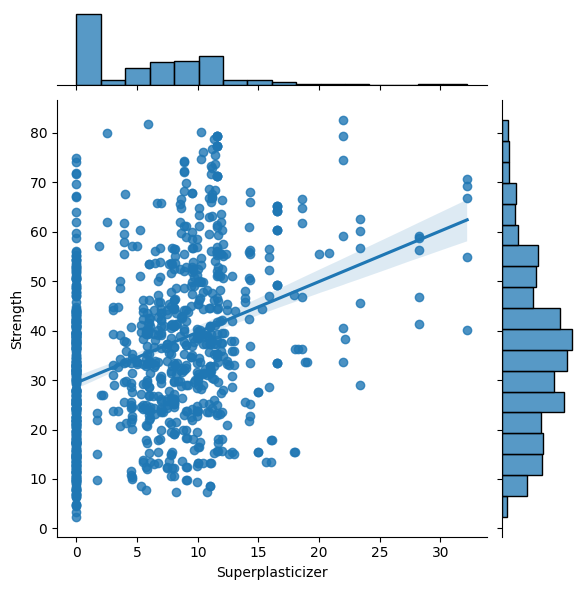

In [15]:
g=sns.JointGrid(data=df,y='Strength',x='Superplasticizer')
g.plot(sns.regplot,sns.histplot)

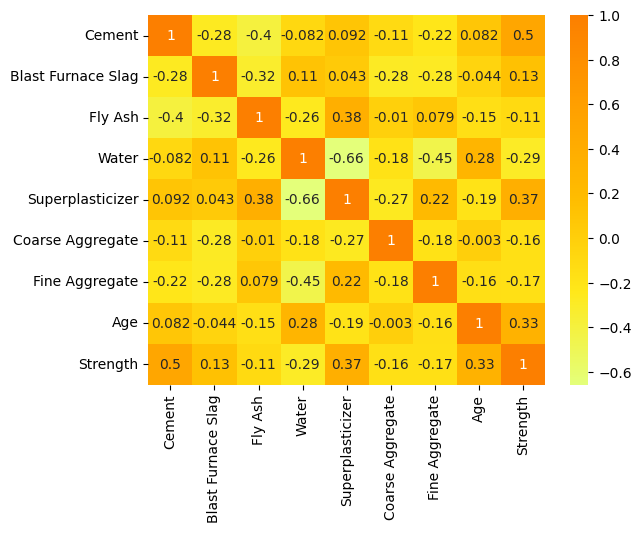

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

**Correlation between Superplasticizer and Stregth is maximum so we use linear regression on thees**

#**FEATURE** **SELECTION**

In [81]:
x = df['Strength'].values
y = df['Superplasticizer'].values

In [82]:
x=x.reshape(-1,1)

In [83]:
print(x.shape,y.shape)

(1030, 1) (1030,)


In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

In [149]:
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)


Lasso()

In [150]:

linear_pred = linear_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)


In [151]:
from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_test, linear_pred)
mse_ridge = mean_squared_error(y_test, ridge_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)

print("Mean Squared Error for Linear Regression:", mse_linear)
print("Mean Squared Error for Ridge Regression:", mse_ridge)
print("Mean Squared Error for Lasso Regression:", mse_lasso)


Mean Squared Error for Linear Regression: 0.16342487842925055
Mean Squared Error for Ridge Regression: 0.16289650554019736
Mean Squared Error for Lasso Regression: 0.43817677952193596


In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=90, batch_size=10, verbose=0)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (ANN):", mse)

1/1 [==============================] - 0s 116ms/step
Mean Squared Error (ANN): 0.15898690557538273


ACCURACY FROM NEURAL NETWORK IS =0.1589
